# Importing necessary packages

This option 

    %matplotlib inline
    
is one of the "IPython magic". It draws the figures using matplotlib and put it back into this notebook. This makes the IPython notebook extremely powerful by allowing us to iteratively and interactively analyze data. 

In [1]:
import matplotlib.pyplot as plt 
import scipy
import pandas as pd
%matplotlib inline 

# Loading the coordinates of pumps and deaths using pandas

The datafiles are obtained from [here](http://www.udel.edu/johnmack/frec480/cholera/cholera2.html). They are in CSV format. The first row is used as the column name in pandas. 

In [2]:
!head pumps.txt

"X","Y"
8.6512012,17.8915997
10.9847803,18.5178509
13.3781900,17.3945408
14.8798304,17.8099194
8.6947680,14.9054699
8.8644161,12.7535400
12.5713596,11.7271700
10.6609697,7.4286470
13.5214596,7.9582500


In [3]:
pumps = pd.read_csv('pumps.txt')
deaths = pd.read_csv('deaths.txt')

Let's see the first few rows of the tables (dataframes), just to see how it looks like. 

In [4]:
pumps[:3]

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541


In [5]:
deaths[:3]

,X,Y
0,13.588010,11.09560
1,9.878124,12.55918
2,14.653980,10.18044


Let's plot them. It'd be great if we can overlay the data on the actual map, but it'll be too much work. Exploratory visualization is often more about efficiency rather than beauty!

`Pandas` provides convenient plot interface that uses `matplotlib`. 

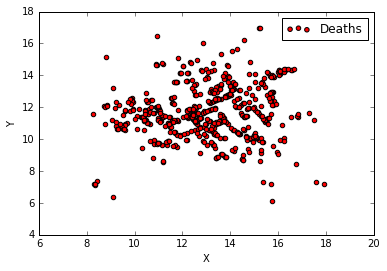

In [6]:
deaths.plot(kind='scatter', x="X", y="Y", color="Red", label="Deaths")

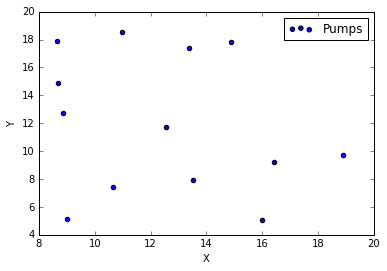

In [7]:
pumps.plot(kind='scatter', x="X", y="Y", color="Blue", label="Pumps")

Ok, we could plot them separately. How can we put them together? There are several ways to do it, but for now let's keep it simple by using axes. The result of the plot is something called `axes` and you can reuse it to overlay other datapoints. Note the `ax=ax` at the second plot. 

`s` option sets the size in the scatterplot. We want to make the pumps stand out more. 

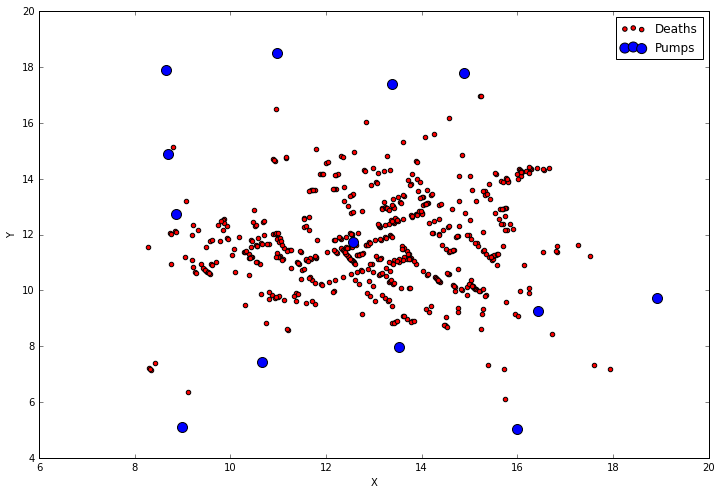

In [8]:
ax = deaths.plot(kind='scatter', x="X", y="Y", color="Red", label="Deaths", figsize=(12,8))
pumps.plot(kind='scatter', x="X", y="Y", color="Blue", s=100, label="Pumps", ax=ax)

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [10]:
points = pumps.as_matrix()

In [11]:
points

array([[  8.6512012,  17.8915997],
       [ 10.9847803,  18.5178509],
       [ 13.37819  ,  17.3945408],
       [ 14.8798304,  17.8099194],
       [  8.694768 ,  14.9054699],
       [  8.8644161,  12.75354  ],
       [ 12.5713596,  11.72717  ],
       [ 10.6609697,   7.428647 ],
       [ 13.5214596,   7.95825  ],
       [ 16.4348907,   9.2521296],
       [ 18.9143906,   9.7378187],
       [ 16.0051098,   5.0468378],
       [  8.9994402,   5.1010232]])

In [12]:
vor = Voronoi(points)

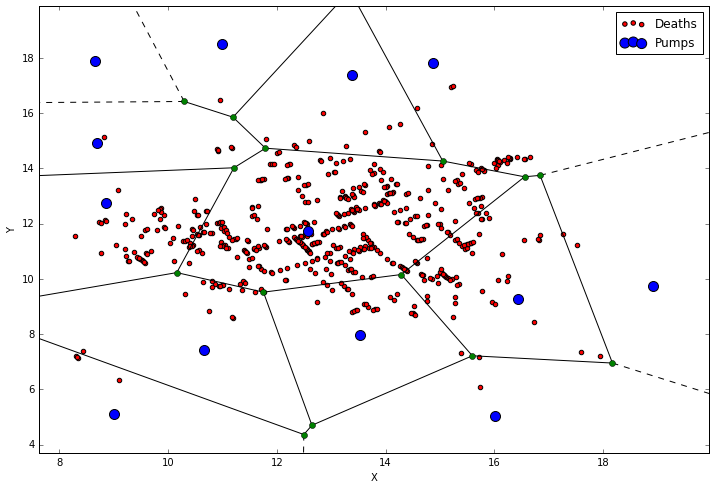

In [13]:
voronoi_plot_2d(vor, ax=ax)